In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from scipy.stats import wasserstein_distance
sys.path.append(os.path.abspath("../../src"))  # Adds 'src' to the module search path

In [3]:
from plot import plot_bar_horizontal,plot_bar_vertical,vertical_boxplot,horizontal_boxplot,create_MAD_comparison_boxplot,create_MAD_comparison_violinplot
from read_data import apply_index_file

In [4]:
np.random.seed(42)
DATASET = "../../data/dataset.parquet"

In [5]:
df =pd.read_parquet(DATASET)

In [6]:
def median_absolute_deviation(series, threshold=None):
    if threshold is not None and len(series) < threshold:
        return None
    
    # Convert to numpy array if it's not already
    if isinstance(series, pd.Series):
        data = series.values
    else:
        data = np.asarray(series)
    
    # Calculate the median
    median_value = np.median(data)
    
    # Calculate the absolute deviations from the median
    abs_deviations = np.abs(data - median_value)
    
    # Calculate the median of the absolute deviations
    mad = np.median(abs_deviations)
    
    return mad

In [7]:
testing = df.groupby('modified_sequence')['label'].apply(lambda x: median_absolute_deviation(x))

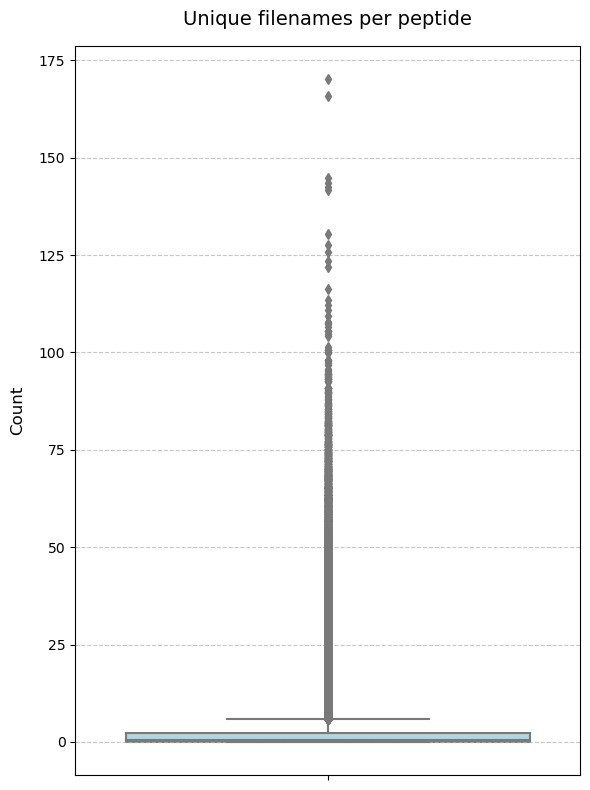

In [8]:
vertical_boxplot(testing,"Count","Unique filenames per peptide")

In [12]:
testing.describe(percentiles=[0.25, 0.5, 0.75, 0.90])

count    964395.000000
mean          1.854237
std           4.166261
min           0.000000
25%           0.000000
50%           0.581978
75%           2.315275
90%           4.503693
max         170.183026
Name: label, dtype: float64

In [17]:
values_above_p90 = testing[testing > testing.quantile(0.90)]
values_under_p90 = testing[testing < testing.quantile(0.90)]


In [15]:
len(values_above_p90)

96440

In [18]:
values_under_p90.describe()

count    867955.000000
mean          0.962739
std           1.207809
min           0.000000
25%           0.000000
50%           0.356301
75%           1.708371
max           4.503673
Name: label, dtype: float64